<a href="https://colab.research.google.com/github/HMNS19/Mini-Project-Crash-Prediction/blob/main/aiml_aat%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cloudburst Prediction for Disaster Management
# ---------- 1. Import necessary libraries ----------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    print("Uploaded file:", filename)
    df = pd.read_csv(filename)

df.head()



Saving snowflake_cloudburst_balanced_modified.csv to snowflake_cloudburst_balanced_modified.csv
Uploaded file: snowflake_cloudburst_balanced_modified.csv


,timestamp,latitude,longitude,temperature_C,humidity_pct,pressure_hPa,wind_speed_m_s,rainfall_intensity_mm_hr,rainfall_rate_change_mm_hr2,cloudburst
0,2025-02-09 20:00:00,30.275595,77.649516,14.682966,72.142716,837.821827,2.280188,-0.290146,1.397912,1
1,2024-09-05 14:00:00,30.402002,78.133311,9.405904,93.474561,858.179442,0.794192,-0.513593,4.030426,0
2,2024-02-03 07:00:00,30.301255,78.022649,20.856303,84.627894,843.747683,1.180941,-0.079416,0.230669,0
3,2024-06-24 13:00:00,30.093934,78.069607,12.488033,65.692722,846.128806,-0.009526,-0.255542,2.179479,1
4,2024-03-12 18:00:00,30.660486,78.128314,17.500562,89.714564,850.750479,3.231860,0.066683,0.514570,1


In [3]:
# ---------- 3. Preprocessing ----------
df = df.drop(columns=['timestamp', 'TIMESTAMP'], errors='ignore')
df = df.dropna()
df.columns = [col.strip().upper() for col in df.columns]



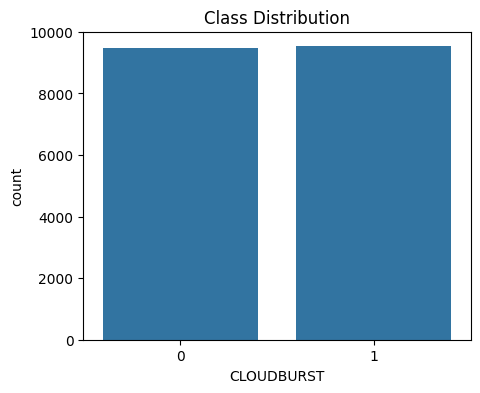

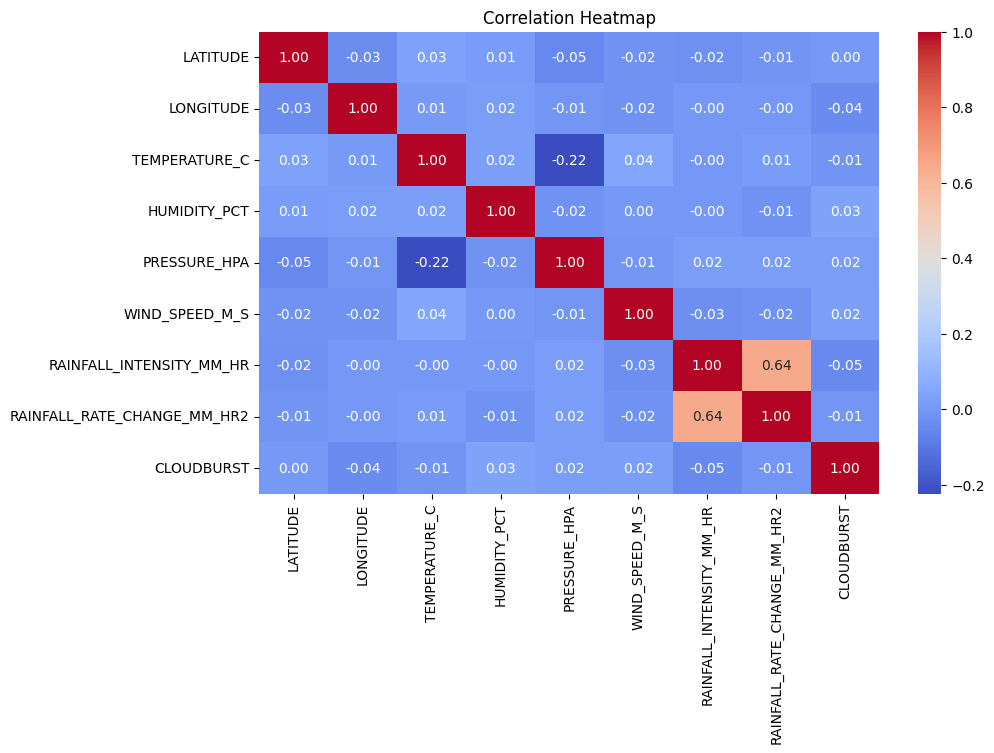

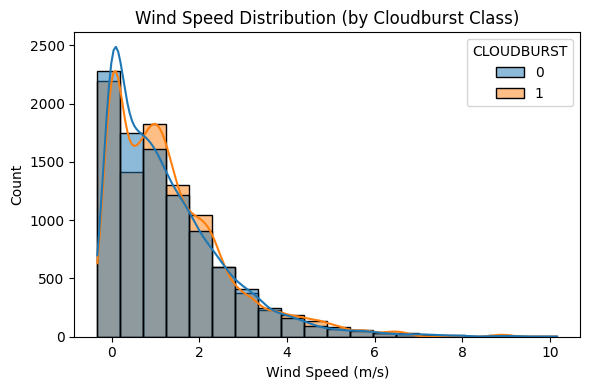

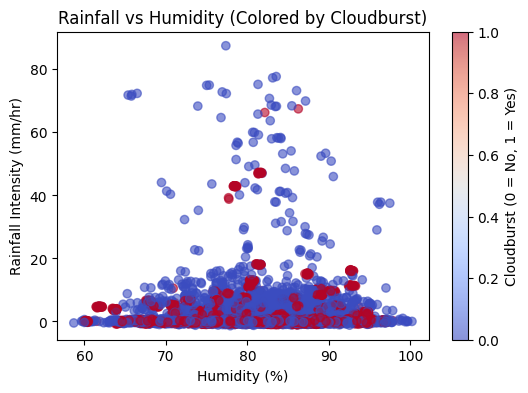

In [4]:
# ---------- 4. EDA ----------
plt.figure(figsize=(5, 4))
sns.countplot(x='CLOUDBURST', data=df)
plt.title("Class Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Wind Speed Distribution by Class
plt.figure(figsize=(6,4))
sns.histplot(df, x='WIND_SPEED_M_S', hue='CLOUDBURST', bins=20, kde=True)
plt.title("Wind Speed Distribution (by Cloudburst Class)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Rainfall vs Humidity Scatter Plot
plt.figure(figsize=(6, 4))
scatter = plt.scatter(df['HUMIDITY_PCT'], df['RAINFALL_INTENSITY_MM_HR'],
                      c=df['CLOUDBURST'], cmap='coolwarm', alpha=0.6)
plt.xlabel("Humidity (%)")
plt.ylabel("Rainfall Intensity (mm/hr)")
plt.title("Rainfall vs Humidity (Colored by Cloudburst)")
plt.colorbar(scatter, label='Cloudburst (0 = No, 1 = Yes)')
plt.show()


In [5]:
# ---------- 5. Train-Test Split ----------
X = df.drop(columns=['CLOUDBURST'])
y = df['CLOUDBURST']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test,y_pred_dt)
precision = precision_score(y_test, y_pred_dt, zero_division=0)
recall = recall_score(y_test, y_pred_dt, zero_division=0)
f1 = f1_score(y_test, y_pred_dt, zero_division=0)
auc = roc_auc_score(y_test, y_prob_dt)

print("\n================= SUPERVISED (Random Forest) =================")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


================= SUPERVISED (Random Forest) =================
Accuracy : 84.87%
Precision: 0.8386
Recall   : 0.8678
F1-score : 0.8530
AUC      : 0.8485


In [11]:
# ---------- 6. Supervised Model: Random Forest ----------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_prob)

print("\n================= SUPERVISED (Random Forest) =================")
print(f"Accuracy : {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")



================= SUPERVISED (Random Forest) =================
Accuracy : 95.50%
Precision: 0.9497
Recall   : 0.9620
F1-score : 0.9558
AUC      : 0.9704


In [12]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

print("\n--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_dt))

print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8486842105263158
Random Forest Accuracy: 0.955

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1878
           1       0.84      0.87      0.85      1922

    accuracy                           0.85      3800
   macro avg       0.85      0.85      0.85      3800
weighted avg       0.85      0.85      0.85      3800


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1878
           1       0.95      0.96      0.96      1922

    accuracy                           0.95      3800
   macro avg       0.96      0.95      0.95      3800
weighted avg       0.96      0.95      0.95      3800



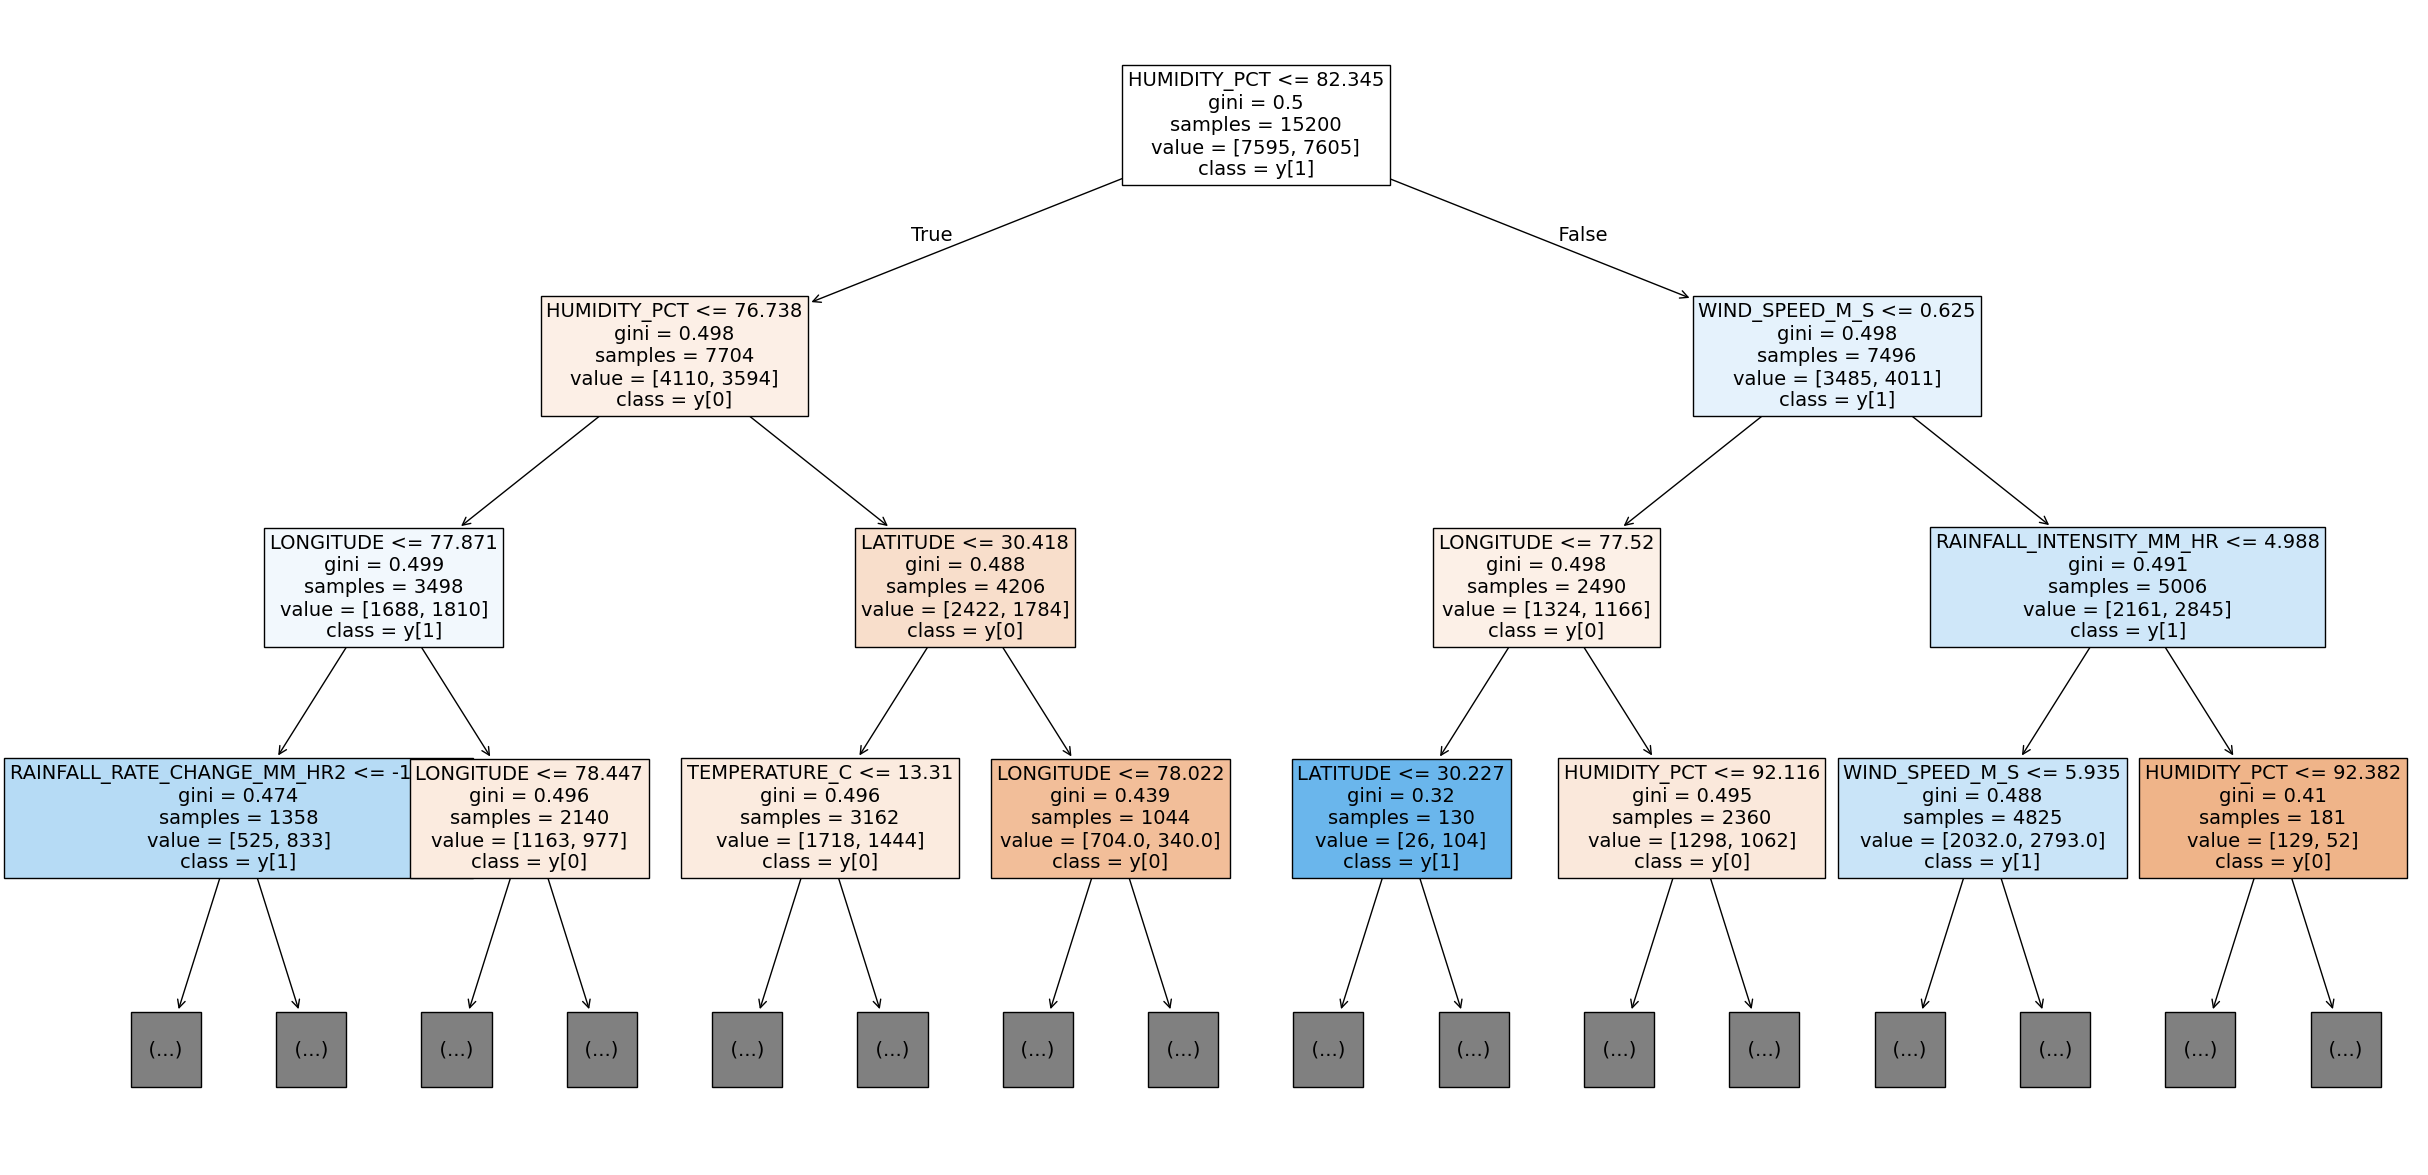

In [26]:
plt.figure(figsize=(30,15))
plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,
    class_names=True,
    max_depth=3,
    fontsize=14
)
plt.show()



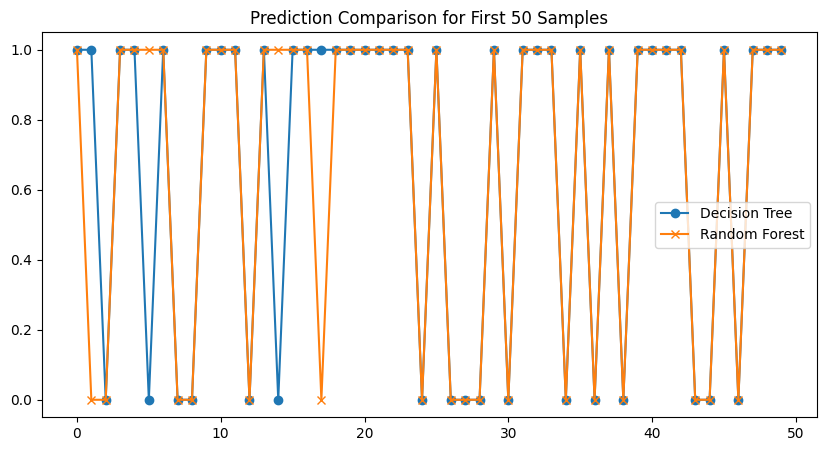

In [15]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_dt[:50], marker='o', label='Decision Tree')
plt.plot(y_pred[:50], marker='x', label='Random Forest')
plt.title("Prediction Comparison for First 50 Samples")
plt.legend()
plt.show()


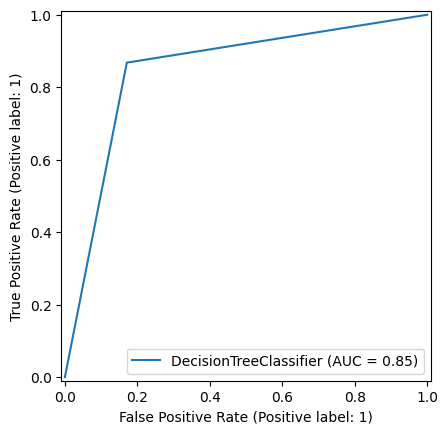

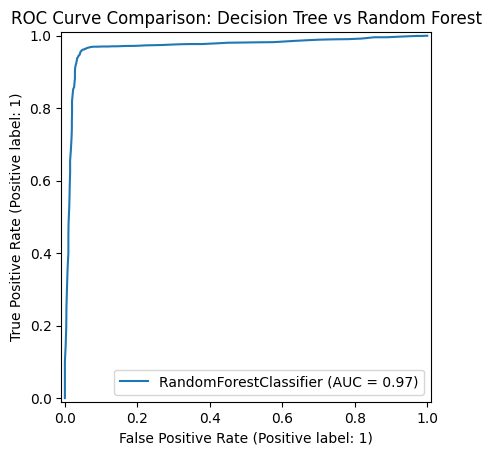

In [19]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_test, y_test)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve Comparison: Decision Tree vs Random Forest")
plt.show()


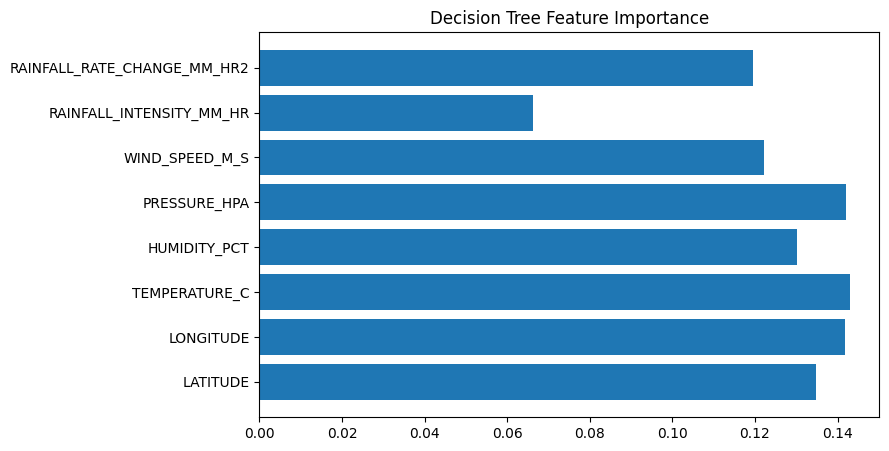

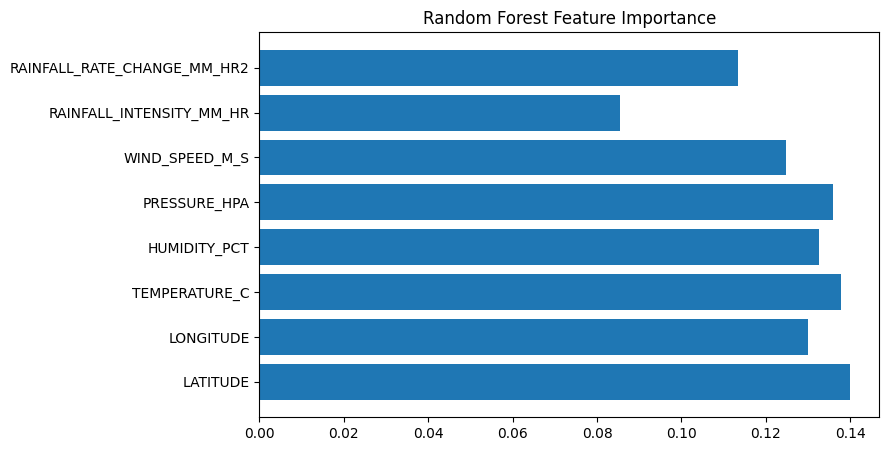

In [23]:
plt.figure(figsize=(8,5))
plt.barh(X.columns, dt.feature_importances_)
plt.title("Decision Tree Feature Importance")
plt.show()

plt.figure(figsize=(8,5))
plt.barh(X.columns, rf_model.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()


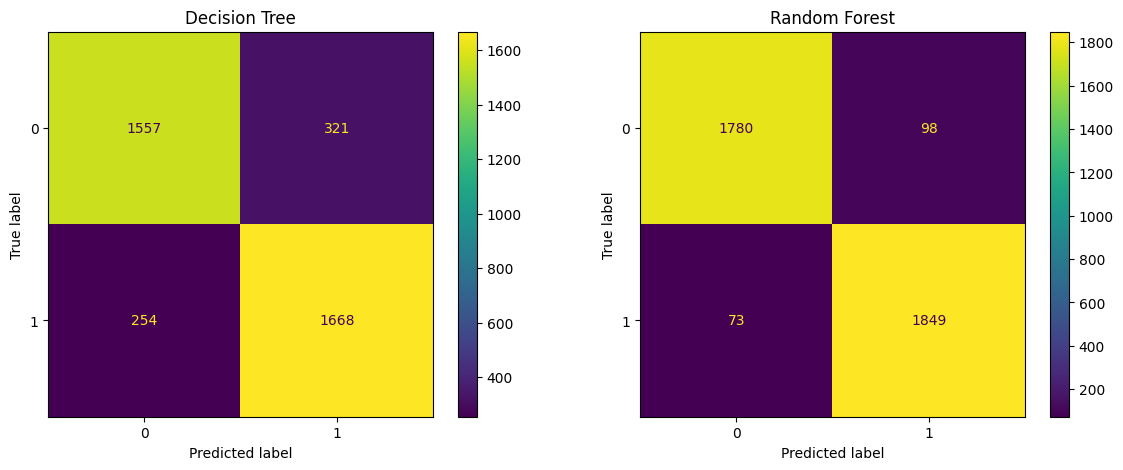

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=ax[0])
ax[0].set_title("Decision Tree")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[1])
ax[1].set_title("Random Forest")

plt.show()


In [ ]:

# ---------- 7. Unsupervised Model: Isolation Forest ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_unsup_pred = iso_forest.fit_predict(X_scaled)

# IsolationForest outputs:
# -1 = anomaly (possible cloudburst)
#  1 = normal
y_unsup_pred = (y_unsup_pred == -1).astype(int)  # convert to 1 = anomaly

# Compare with true labels (for evaluation only)
unsup_accuracy = accuracy_score(y, y_unsup_pred)
unsup_precision = precision_score(y, y_unsup_pred, zero_division=0)
unsup_recall = recall_score(y, y_unsup_pred, zero_division=0)
unsup_f1 = f1_score(y, y_unsup_pred, zero_division=0)

print("\n================= UNSUPERVISED (Isolation Forest) =================")
print(f"Accuracy : {unsup_accuracy * 100:.2f}%")
print(f"Precision: {unsup_precision:.4f}")
print(f"Recall   : {unsup_recall:.4f}")
print(f"F1-score : {unsup_f1:.4f}")




================= UNSUPERVISED (Isolation Forest) =================
Accuracy : 50.13%
Precision: 0.5137
Recall   : 0.1024
F1-score : 0.1708



================= MODEL COMPARISON =================
      Metric  Supervised (RF)  Unsupervised (IF)
0   Accuracy         0.955000           0.501316
1  Precision         0.949666           0.513684
2     Recall         0.962019           0.102446
3   F1-score         0.955803           0.170823


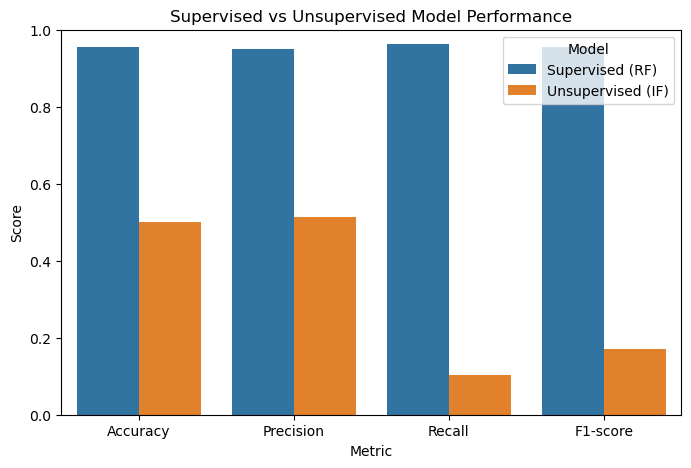

In [ ]:
# ---------- 8. Comparison Summary ----------
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Supervised (RF)': [accuracy, precision, recall, f1],
    'Unsupervised (IF)': [unsup_accuracy, unsup_precision, unsup_recall, unsup_f1]
})
print("\n================= MODEL COMPARISON =================")
print(comparison)

# ---------- 9. Visualization ----------
comparison_melted = comparison.melt(id_vars='Metric', var_name='Model', value_name='Score')
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted)
plt.title("Supervised vs Unsupervised Model Performance")
plt.ylim(0, 1)
plt.show()


Feature Importances (Random Forest):
                        Feature  Importance
0                     LATITUDE    0.139948
2                TEMPERATURE_C    0.137844
4                 PRESSURE_HPA    0.135988
3                 HUMIDITY_PCT    0.132574
1                    LONGITUDE    0.129964
5               WIND_SPEED_M_S    0.124769
7  RAINFALL_RATE_CHANGE_MM_HR2    0.113352
6     RAINFALL_INTENSITY_MM_HR    0.085561


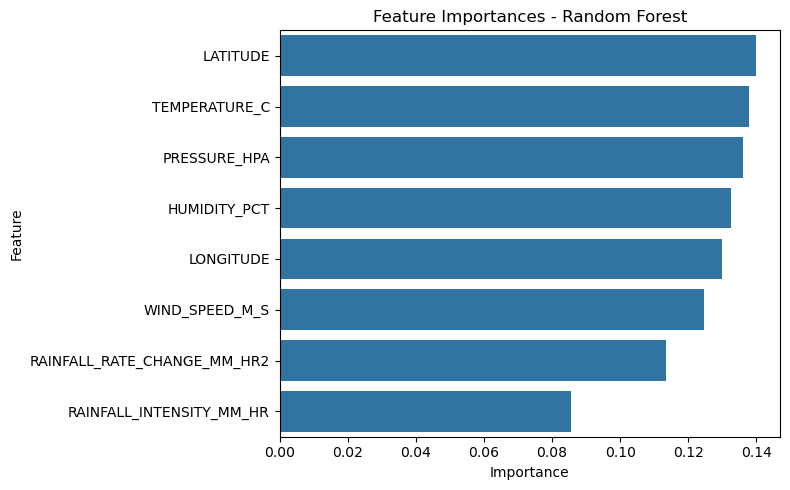

In [ ]:
# ---------- 10. Feature Importance (RF only) ----------
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):\n", feature_importance_df)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()